# Mutant data displayed in bar plots

Here, we display the large data set in two different ways, first as a heat map with custom color scales, and then as a bar chart with error bars. 

In [1]:
%matplotlib inline
import pandas 
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib import rc 

rc( 'font', family='Source Sans Pro' )
plt.style.use( 'bmh' ) 

In [2]:
df = pandas.read_csv( 'data_set/targets.csv', index_col=0 ) 
df.head()

,sequence_pos,expression,tm,k,err_tm,err_k,kcat,err_kcat,km,err_km,...,ki,ki_percent_err,ki_err,gel_number,target_expression,target_tm,target_kcat,target_km,target_kcatkm,conserved
mutant,,,,,,,,,,,,,,,,,,,,,
G12N,12.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16.0,0,NaN,NaN,NaN,NaN,0.962179
S14A,14.0,1,40.16,-1.72,0.30,0.37,320.0,11.0,8.25,1.02,...,NaN,NaN,NaN,9.0,1,0.23,-0.439333,-0.217484,-0.651460,0.157390
T15A,15.0,1,39.17,-0.58,0.23,0.07,614.0,14.7,5.30,0.48,...,NaN,NaN,NaN,2.0,1,-0.76,-0.156314,-0.025306,-0.176657,0.615834
S16A,16.0,1,39.41,-0.83,0.27,0.16,154.0,1.0,14.01,0.40,...,NaN,NaN,NaN,5.0,1,-0.52,-0.756962,-0.447468,-1.199275,0.402336
S16N,16.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.0,0,NaN,NaN,NaN,NaN,0.402336


## Relative to the native sequence 

First, let's visualize the changes that occur for each mutation

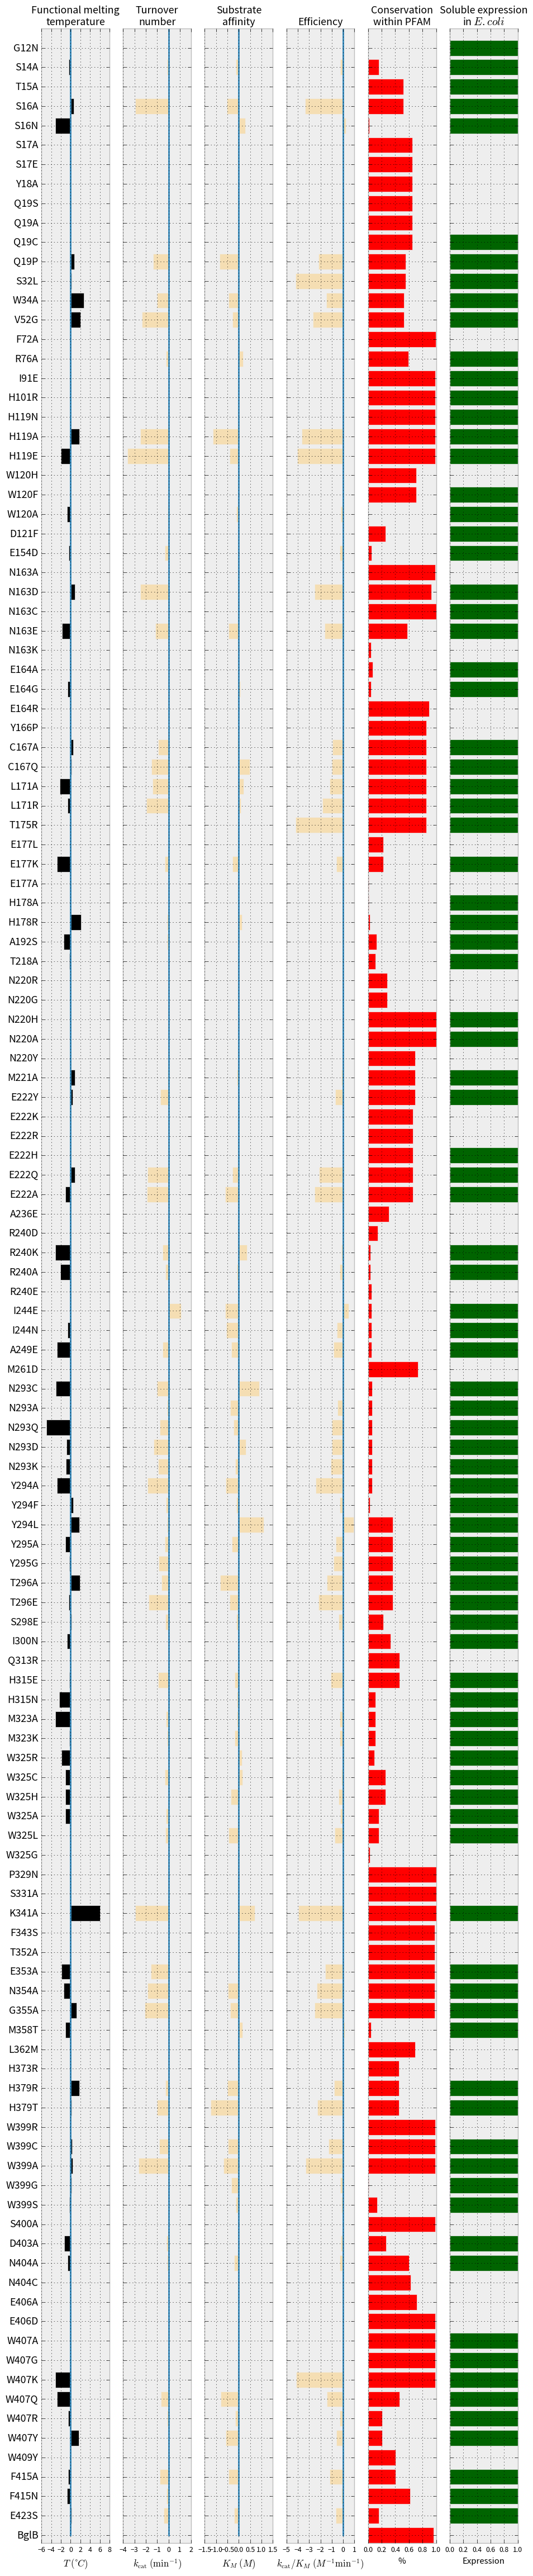

In [3]:
fig, ax = plt.subplots( nrows=1, ncols=6, figsize=( 11, 0.45 * 129 ), sharey=True ) 

# labels 
index = list( range( len( df ) ) )

ax[0].set_yticks( index ) 
ax[0].set_yticklabels( df.index[::-1], fontsize='x-large' )
ax[0].barh( index, df.target_tm, color='k', align='center' ) 
ax[1].barh( index, df.target_kcat, color='wheat', align='center' )
ax[2].barh( index, df.target_km, color='wheat', align='center' )
ax[3].barh( index, df.target_kcatkm, color='wheat', align='center' )
ax[4].barh( index, df.conserved, color='red', align='center' )
ax[5].barh( index, df.expression, color='darkgreen', align='center' ) 
for i in [ 0, 1, 2, 3 ]:
    ax[ i ].plot( (0,0), (0,129) )

# titles 
ax[0].set_title( 'Functional melting\ntemperature' )
ax[1].set_title( 'Turnover\nnumber' )
ax[2].set_title( 'Substrate\naffinity' )
ax[3].set_title( 'Efficiency' )
ax[4].set_title( 'Conservation\nwithin PFAM' )
ax[5].set_title( 'Soluble expression\nin $E. coli$' )

# xlabels 
ax[0].set_xlabel( '$T \; (˚C)$' )
ax[1].set_xlabel( '$k_{\mathrm{cat}} \; (\mathrm{min}^{-1})$' )
ax[2].set_xlabel( '$K_M \; (M)$' )
ax[3].set_xlabel( '$k_{\mathrm{cat}}/K_M \; (M^{-1}\mathrm{min}^{-1})$' )
ax[4].set_xlabel( '%' )
ax[5].set_xlabel( 'Expression' )

plt.show()

## Absolute values 

Absolute values for the experimental data 

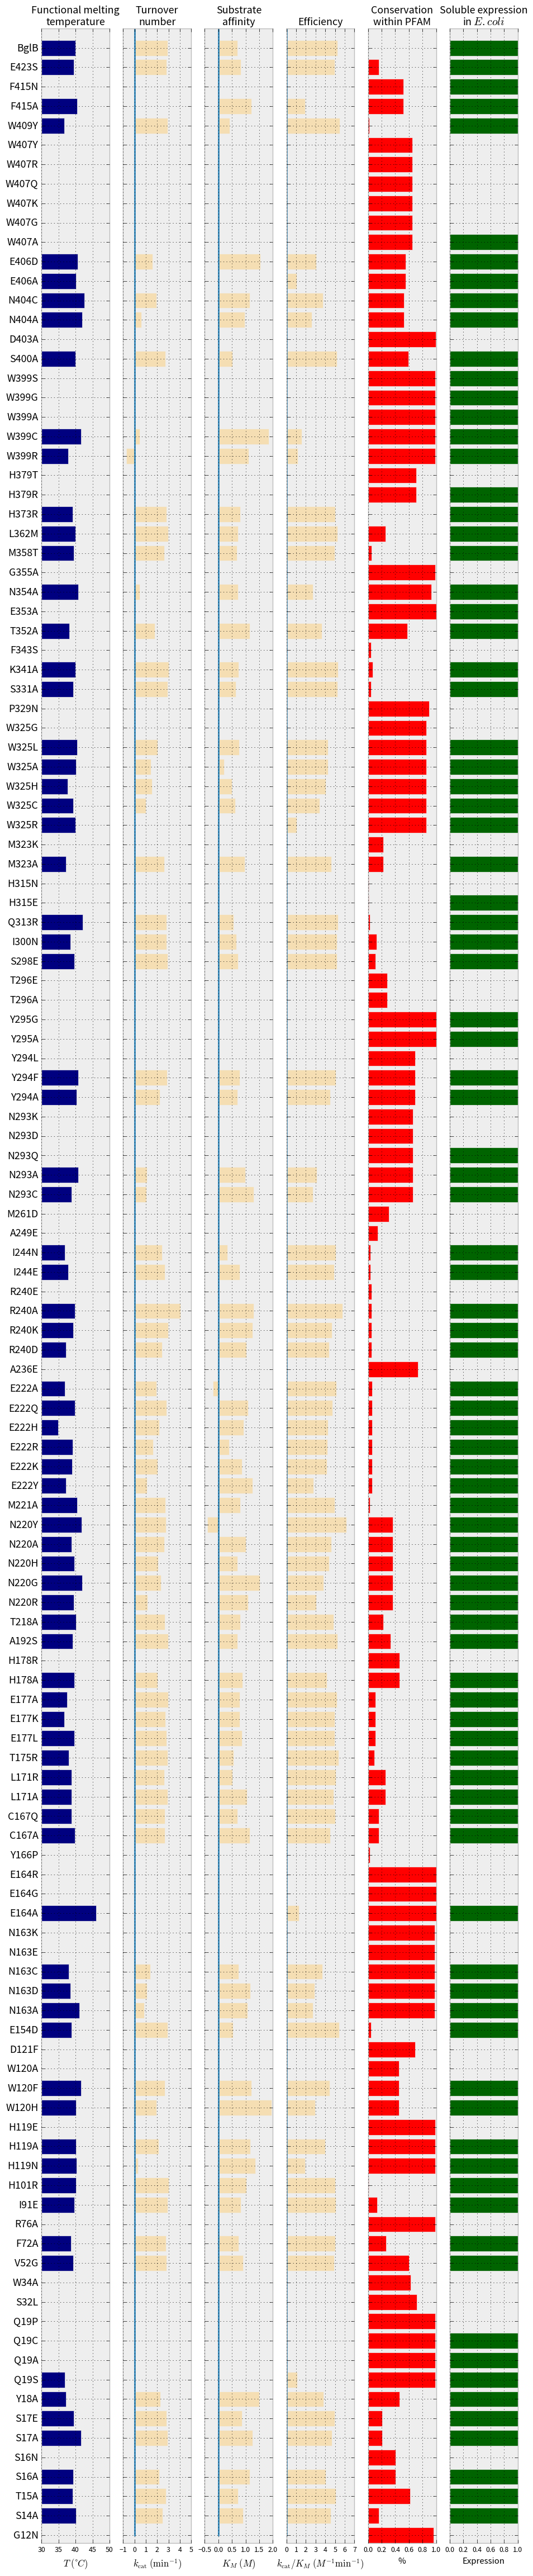

In [4]:
fig, ax = plt.subplots( nrows=1, ncols=6, figsize=( 11, 0.45 * 129 ), sharey=True ) 

# labels 
index = list( range( len( df ) ) )

ax[0].set_yticks( index ) 
ax[0].set_yticklabels( df.index, fontsize='x-large' )

# data 
ax[0].barh( index, df.tm, color='navy', align='center' ) 
ax[0].set_xlim( ( 30, 50 ) ) 
ax[1].barh( index, np.log10(df.kcat), color='wheat', align='center' )
ax[2].barh( index, np.log10(df.km), color='wheat', align='center' )
ax[3].barh( index, np.log10(df.kcatkm), color='wheat', align='center' )
ax[4].barh( index, df.conserved, color='red', align='center' )
for i in [ 0, 1, 2, 3 ]:
    ax[ i ].plot( (0,0), (0,129) )
ax[5].barh( index, df.expression, color='darkgreen', align='center' ) 

# titles 
ax[0].set_title( 'Functional melting\ntemperature' )
ax[1].set_title( 'Turnover\nnumber' )
ax[2].set_title( 'Substrate\naffinity' )
ax[3].set_title( 'Efficiency' )
ax[4].set_title( 'Conservation\nwithin PFAM' )
ax[5].set_title( 'Soluble expression\nin $E. coli$' )

# xlabels 
ax[0].set_xlabel( '$T \; (˚C)$' )
ax[1].set_xlabel( '$k_{\mathrm{cat}} \; (\mathrm{min}^{-1})$' )
ax[2].set_xlabel( '$K_M \; (M)$' )
ax[3].set_xlabel( '$k_{\mathrm{cat}}/K_M \; (M^{-1}\mathrm{min}^{-1})$' )
ax[4].set_xlabel( '%' )
ax[5].set_xlabel( 'Expression' )

plt.show()

In referecne to the equation $$x+y$$